In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pandas as pd
from astropy.io import fits
from pylab import cm

%matplotlib inline

In [3]:
wiener_kappa = fits.open('DESY3_wiener_filter_kappa.fits')[1].data['WF_E_noise']

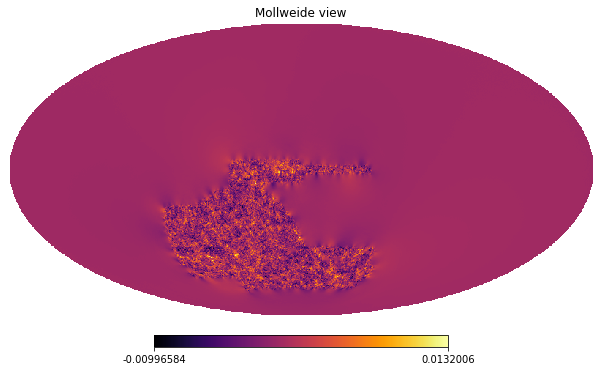

In [4]:
hp.mollview(wiener_kappa, cmap="inferno")

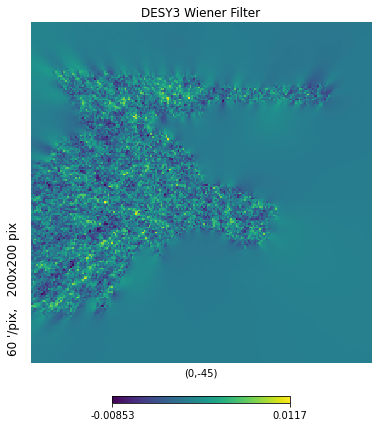

In [5]:
hp.gnomview(wiener_kappa, rot=[0, -45], reso=60, title="DESY3 Wiener Filter")

In [6]:
mask = hp.read_map("DESY3_sky_mask.fits").astype(np.bool_)
wiener_kappa_masked = hp.ma(wiener_kappa)
wiener_kappa_masked.mask = np.logical_not(mask)
masked_map=np.where(mask==True, wiener_kappa, hp.UNSEEN)

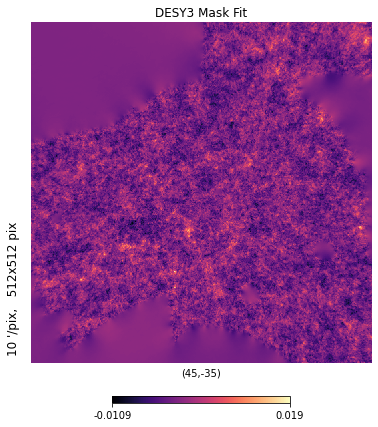

In [25]:
projected_array = hp.gnomview(wiener_kappa, rot=[45, -35], reso=10, 
            cmap="magma", title="DESY3 Mask Fit", return_projected_map=True,
           xsize=512, badcolor="white")

In [17]:
print(projected_array)

[[-2.38800962e-03 -3.83548583e-03 -3.62614423e-03 ...  1.06277743e-03
  -1.45448800e-03 -3.40455367e-03]
 [-2.34982098e-03 -2.57065534e-03 -3.09877286e-03 ... -2.87668833e-03
  -4.29636238e-03 -5.05799696e-03]
 [-3.25999884e-03 -2.44263193e-03 -2.91783996e-03 ... -4.00361782e-03
  -4.73029159e-03 -4.89178985e-03]
 ...
 [ 1.04385254e-04  7.64443374e-05  9.57282498e-05 ...  8.27809358e-04
   7.35462458e-04  5.42596177e-04]
 [ 6.72611367e-05  5.72467042e-05  1.02842194e-04 ...  8.34187478e-04
   7.10065104e-04  6.02042966e-04]
 [ 1.17618964e-04  9.23257247e-05  1.05452512e-04 ...  9.69651370e-04
   7.45888193e-04  7.14575363e-04]]


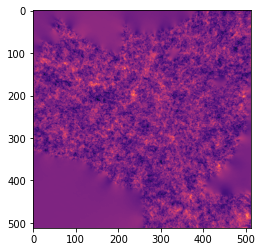

In [26]:
np.save('projected_array', projected_array.data)
plt.imshow(projected_array, cmap="magma")

In [ ]:
hp.gnomview(wiener_kappa_masked.filled(), rot=[0.45, -0.45], reso=60, 
            cmap="magma")



In [20]:
np.ma.is_masked(projected_array)

False

In [ ]:
plt.hist(wiener_kappa_masked.compressed(), bins=1000);
plt.title("Histogram of DESY3 Masked Data")

In [ ]:
LMAX = 1024
cl = hp.anafast(wiener_kappa_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

#hp.anafast is a nice tool for computing angular power spectra from maps

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.title("Power Spectrum for the DESY3 Masked Data")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

In [ ]:
wiener_kappa_smoothed = hp.smoothing(wiener_kappa, fwhm=np.radians(1.))
hp.mollview(wiener_kappa_smoothed, min=0, max=0.0015, title="Map smoothed 1 deg")
